# Plan-Merging-Project-Sauerbrei-Raatschen
## Notebook for visualising data

### Setting up the project

In [1]:
import numpy as np
import pandas as pd

In [91]:
#df = pd.read_csv("./solvers/results.csv")
df = pd.read_csv("./results.csv")

allSolver = ["SP","PP","CBS"]

In [92]:
#Splitting data by solver 

#Dataframe of sequential planning
spdf = df[df['solver'] == 'SP']

#Dataframe of prioritized planning
ppdf = df[df['solver'] == 'PP']

#Dataframe of cbs
cbsdf = df[df['solver'] == 'CBS']


In [93]:
#Joining data by instance

combineddf = spdf.set_index('instance').join(ppdf.set_index('instance'),lsuffix="_SP", rsuffix="_PP")
combineddf = combineddf.join(cbsdf.set_index('instance').add_suffix('_CBS'),lsuffix="",rsuffix="")



## Functions

16.45430999994278
16.45430999994278


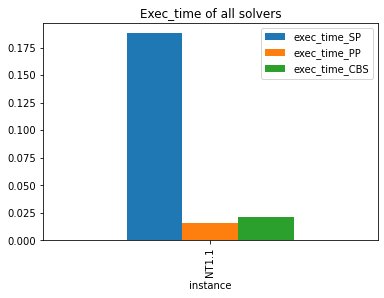

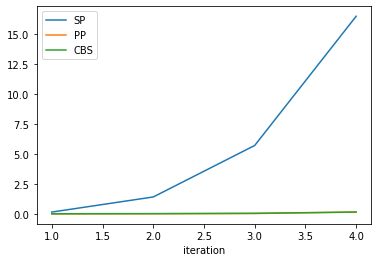

In [95]:
def plotInstance(instanceName : str, df : pd.DataFrame):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance to analyze
    :param df: Dataframe indexed by instance
    :return: None
    """ 
    
    newdf = df.filter(like = instanceName, axis = 0)
    
    ax = newdf[['exec_time_SP','exec_time_PP','exec_time_CBS' ]].plot.bar(title = 'Exec_time of all solvers')


def averageTime(instanceName : str,solverName : str, df : pd.DataFrame, iterationNumber = -1):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param solverName: Name of the used solver, e.g. "SP", "PP", "CBS"
    :param df: Dataframe indexed by instance
    :param iterationNumber: (Optional) number of iteration to be looked at
    :return: None
    """ 
    if iterationNumber != -1: instanceName = instanceName+str(iterationNumber)
        
    newdf = df.filter(like = instanceName, axis = 0)
    newdf = newdf['exec_time_'+solverName]
    
    return newdf.sum() / newdf.size

def plotScale(instanceName : str, df : pd.DataFrame):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param df: Dataframe indexed by instance
    :return: A list, containing for every solver a dataframe, with the avg_time per iteration
    """ 
    newdf = df.filter(like = instanceName, axis = 0)
    allResults = []
    
    for solver in allSolver:
        solverResult = pd.DataFrame(columns = ['iteration','avg_exec_time'])
        numberOfIterations = len(newdf.filter(like = instanceName+str(allSolver.index(solver)+1),axis = 0))
        for i in range(1,numberOfIterations+1):
            avg_time = averageTime(instanceName,solver, newdf, iterationNumber = i)
            solverResult = solverResult.append(pd.DataFrame({'iteration':[i],'avg_exec_time':[avg_time]}),ignore_index=True)
        allResults.append(solverResult)
        
    ax = allResults[0].plot(x='iteration',y='avg_exec_time',label=allSolver[0])
    for dataNumber in range(1,len(allResults)):
        allResults[dataNumber].plot(ax=ax,x='iteration',y='avg_exec_time',label=allSolver[dataNumber])
    
    return allResults
    

    
    
plotInstance("NT1.1", combineddf)
print(averageTime("NT","SP", combineddf, iterationNumber = 4))
print(averageTime("NT4","SP", combineddf))
dataOfThePlot = plotScale("NT",combineddf)

### Plotting data

<AxesSubplot:title={'center':'Exec_time for cbs'}, xlabel='instance'>

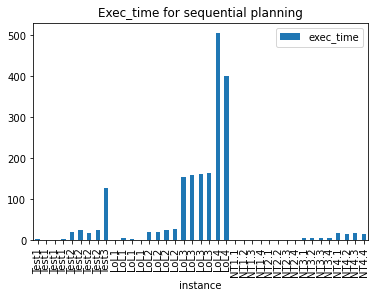

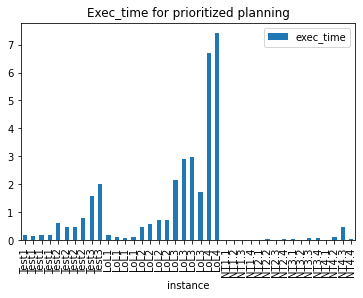

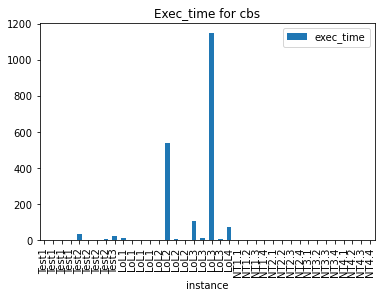

In [6]:
spdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for sequential planning')
ppdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for prioritized planning')
cbsdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for cbs')

<AxesSubplot:title={'center':'Exec_time of all solvers'}, xlabel='instance'>

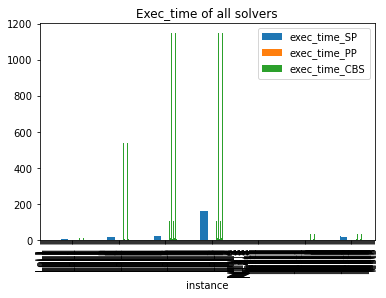

In [96]:
combineddf[['exec_time_SP','exec_time_PP','exec_time_CBS' ]].plot.bar(title = 'Exec_time of all solvers')